# Data Prep

In [ ]:
from scripts_tensor.parquetreader import read_parquet_file
from scripts_tensor.dataprep import prepare_and_split_data_grouped
import os,sys
import pandas as pd

current_directory = os.getcwd()
parquet_file_path = os.path.join(current_directory, 'tensor-input', 'sample_trainingdata.parquet')

dfmodelstep1=read_parquet_file(parquet_file_path)
print(dfmodelstep1.shape[0])

# Assuming dfmodelstep1 is your DataFrame, 'target' is your target column
savcols=['customer_ID','S_2']
Target='target'
group='customer_ID'

X,X_train,X_test,X_train_scaled, X_test_scaled, y_train, y_test, identifiers_train, identifiers_test,feature_names = prepare_and_split_data_grouped(dfmodelstep1, Target,savcols, group)


# Model Run

In [ ]:
import importlib
import scripts_tensor.model_transformer 
importlib.reload(scripts_tensor.model_transformer)
from scripts_tensor.model_transformer import create_model_with_transformer_and_train

model, history, test_accuracy,y_test, y_pred,X_test_reshaped,X_train_reshaped = create_model_with_transformer_and_train(X_train_scaled,y_train, X_test_scaled, y_test)

# Tensorboard

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Start TensorBoard within the notebook using the directory where the logs are stored
%tensorboard --logdir logs/fit

# Performance and Confusion Matrix

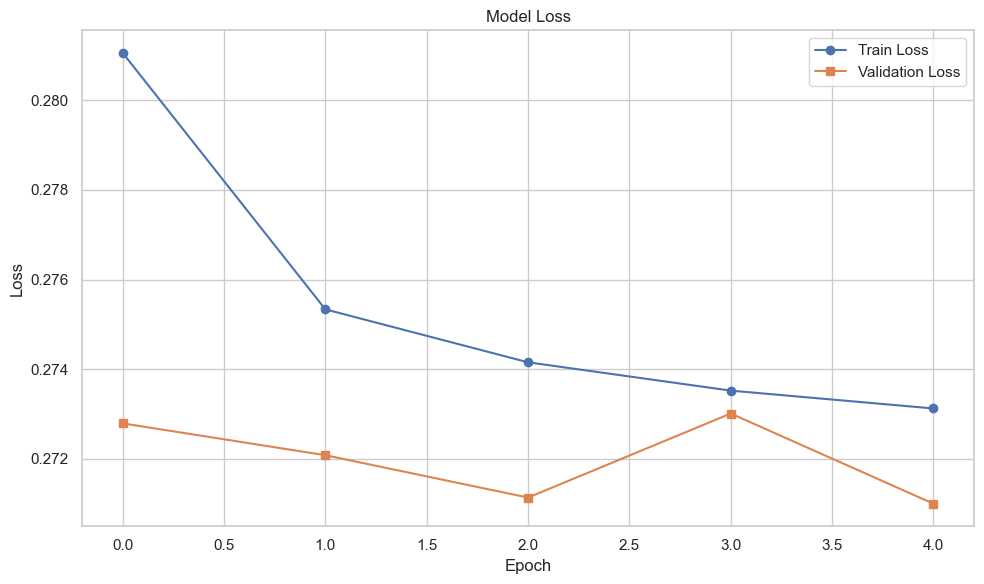

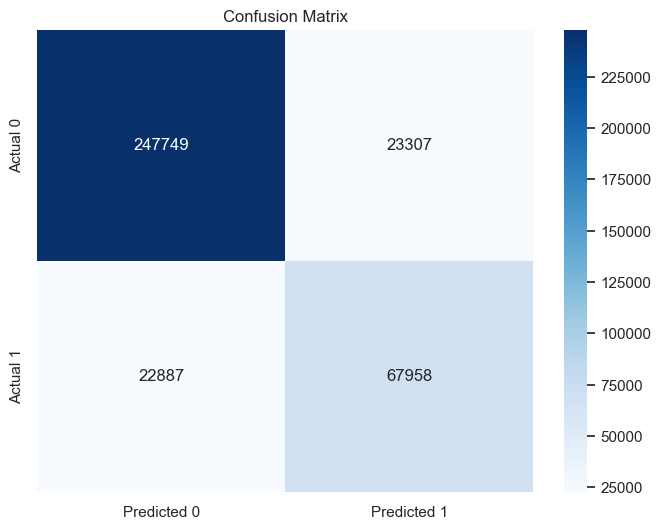

In [5]:
import importlib
import scripts_tensor.charting as charting_module
importlib.reload(charting_module)
from scripts_tensor.charting import plot_model_loss, plot_confusion_matrix, interactive_confusion_matrix

plot_model_loss(history.history['loss'], history.history.get('val_loss', None))
plot_confusion_matrix(y_test, y_pred)

In [1]:
from flask import Flask
app = Flask(__name__)


# Top Features

In [ ]:
import importlib
import scripts_tensor.topfeatures as topfeatures
importlib.reload(topfeatures)
from scripts_tensor.topfeatures import fit_and_plot_logistic_regression

from scripts_tensor.topfeatures import fit_and_plot_logistic_regression
fit_and_plot_logistic_regression(X_train, X_test, y_train, y_test,feature_names,max_iter=1000, top_features=20)
